In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

In [168]:
df = pd.read_csv("C:\\UniProjects\\DataSci\\final\\data\\0-data-preprocessed.csv")
df.set_index('timestamp', inplace=True)
df.index=pd.to_datetime(df.index)
df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.841667,0.709302,0.953704,0.822581,0.813889,0.716216,0.855932,0.887755,0.818182,0.923077,...,0.858407,0.666667,0.971963,0.705128,0.815029,0.715278,0.833333,0.893333,0.901961,0.869565
2017-01-01 00:05:00,0.858333,0.709302,0.956790,0.826613,0.811111,0.716216,0.855932,0.867347,0.790909,0.879121,...,0.823009,0.948718,0.934579,0.705128,0.884393,0.715278,0.802083,0.866667,0.872549,0.804348
2017-01-01 00:10:00,0.858333,0.709302,0.944444,0.822581,0.811111,0.648649,0.855932,0.867347,0.763636,0.857143,...,0.823009,0.961538,0.934579,0.705128,0.872832,0.715278,0.770833,0.866667,0.843137,0.858696
2017-01-01 00:15:00,0.816667,0.709302,0.947531,0.846774,0.805556,0.729730,0.847458,0.857143,0.736364,0.857143,...,0.831858,0.974359,0.943925,0.705128,0.884393,0.715278,0.812500,0.866667,0.872549,0.826087
2017-01-01 00:20:00,0.866667,0.709302,0.944444,0.850806,0.802778,0.756757,0.826271,0.857143,0.754545,0.857143,...,0.831858,1.000000,0.943925,0.705128,0.838150,0.715278,0.791667,0.866667,0.892157,0.858696


### Train-Test split

#### Setting up start and end dates for each set
Three sets: 
Training - 3 months | Validation - 1 month | Testing - 2 months 

In [169]:
train_start = '2017-01-01 00:00:00'
train_end = '2017-03-31 23:55:00'
val_start = '2017-04-01 00:00:00'
val_end = '2017-04-30 23:55:00'
test_start = '2017-05-01 00:00:00'
test_end = '2017-06-30 23:55:00'

In [170]:
trainset = df[(df.index >= train_start) & (df.index <= train_end)]
valset = df[(df.index >= val_start) & (df.index <= val_end)]
testset = df[(df.index >= test_start) & (df.index <= test_end)]

#### Index reseting for each set

In [171]:
#Index reset for train-test split
trainset_no_idx = trainset.reset_index()
valset_no_idx = valset.reset_index()
testset_no_idx = testset.reset_index()

#train, validation and test splits

if 'timestamp' in trainset_no_idx.columns:
    '''
        Using if statement for potential errors
    '''
    X_train, y_train = trainset_no_idx.drop(columns=['timestamp']),  trainset_no_idx.drop(columns=['timestamp'])
    X_val, y_val = valset_no_idx.drop(columns=['timestamp']),  valset_no_idx.drop(columns=['timestamp'])
    X_test, y_test = testset_no_idx.drop(columns=['timestamp']),  testset_no_idx.drop(columns=['timestamp'])
    
     #Reshaping data for LSTM
    X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
    X_val = np.reshape(X_val.values, (X_val.shape[0], 1, X_val.shape[1]))
    X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    
    print("No errors")
else:
    raise ValueError("Timestamp column not found")

No errors


### Long Short-Term Memory model | LSTM

Defining the model using 75 lstm layers and 325 dense units (one for each sensor)

Compiling with Adam optimizer using mean squared error as a loss metric

Training for 100 epochs using early stopping method with a patience of 8 epochs

In [172]:
model = Sequential()
model.add(LSTM(units=75, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=325))
model.compile(optimizer='adam', loss='mse')

#model training & early stopping
stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
mdl = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[stop])

Epoch 1/100
405/405 [==============================] - 5s 8ms/step - loss: 0.0398 - val_loss: 0.0196
Epoch 2/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0193 - val_loss: 0.0172
Epoch 3/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0174 - val_loss: 0.0162
Epoch 4/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0162 - val_loss: 0.0154
Epoch 5/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0154 - val_loss: 0.0149
Epoch 6/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0147 - val_loss: 0.0145
Epoch 7/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 8/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0139 - val_loss: 0.0140
Epoch 9/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0137 - val_loss: 0.0139
Epoch 10/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0135 - val_lo

#### Plotting for potential overfitting

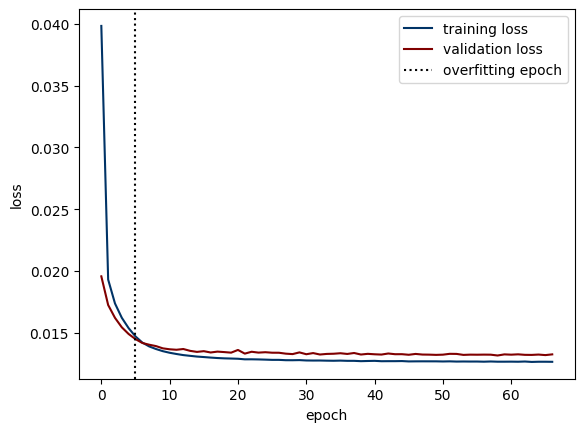

In [173]:
plt.plot(mdl.history['loss'], label='training loss', color='#003366')
plt.plot(mdl.history['val_loss'], label='validation loss', color='maroon')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.axvline(x=5, linestyle='dotted', color='black', label = 'overfitting epoch')
plt.legend()
plt.show()

### Testing the model

In [174]:
#prediction
pred = model.predict(X_test)

549/549 [==============================] - 2s 3ms/step


In [175]:
y_test

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
0,0.758333,0.860465,0.839506,0.814516,0.866667,0.797297,0.830508,0.846939,0.945455,0.884615,...,0.495575,0.833333,0.532710,0.551282,0.722543,0.763889,0.833333,0.840000,0.882353,0.826087
1,0.916667,0.825581,0.790123,0.822581,0.877778,0.810811,0.830508,0.765306,0.945455,0.807692,...,0.477876,0.717949,0.495327,0.461538,0.861272,0.743056,0.791667,0.846667,0.872549,0.836957
2,0.891667,0.802326,0.845679,0.786290,0.875000,0.675676,0.851695,0.785714,0.945455,0.835165,...,0.477876,0.717949,0.467290,0.435897,0.884393,0.756944,0.739583,0.840000,0.892157,0.717391
3,0.808333,0.767442,0.836420,0.806452,0.875000,0.837838,0.817797,0.918367,0.945455,0.818681,...,0.469027,0.717949,0.467290,0.500000,0.953757,0.777778,0.791667,0.813333,0.862745,0.815217
4,0.883333,0.767442,0.845679,0.786290,0.858333,0.891892,0.855932,0.744898,0.763636,0.813187,...,0.460177,0.564103,0.476636,0.487179,0.676301,0.798611,0.718750,0.820000,0.872549,0.760870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,0.800000,0.976744,0.888889,0.564516,0.619444,0.756757,0.822034,0.826531,0.690909,0.939560,...,0.486726,0.884615,0.588785,0.641026,0.768786,0.750000,0.843750,0.853333,0.950980,0.673913
17564,0.833333,0.709302,0.898148,0.560484,0.625000,0.662162,0.843220,0.908163,0.645455,0.928571,...,0.530973,0.948718,0.598131,0.602564,0.849711,0.805556,0.729167,0.880000,0.950980,0.913043
17565,0.841667,0.709302,0.879630,0.568548,0.625000,0.729730,0.813559,0.908163,0.581818,0.928571,...,0.513274,0.846154,0.579439,0.666667,0.832370,0.916667,0.854167,0.866667,0.950980,0.717391
17566,0.908333,1.000000,0.876543,0.568548,0.638889,0.608108,0.868644,0.918367,0.563636,0.829670,...,0.442478,0.769231,0.598131,0.666667,0.838150,0.944444,0.812500,0.886667,0.950980,0.913043


#### Using several metrics to evaluate the model's performance

In [179]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mape =  mean_absolute_percentage_error(y_test, pred)
r2sc = r2_score(y_test, pred)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)
print('R^2:', r2sc)

MSE: 0.017535624704234067
RMSE: 0.13242214582249476
MAPE: 1819960230342.4846
R^2: 0.49266446170640726


#### Creating a dataframe containing the metrics
12 rows. 1 for each 5 minute interval of the hour.

In [180]:
metrics = pd.DataFrame()
for i in range(0,60):
    '''
        counting each metric for each minute of the hour 
        then resampling into the 5 minute intervals we need and storing the median
    '''
    startidx = i * 12
    endidx = (i+1) * 12
    prediction = pred[startidx:endidx]
    testing = y_test.iloc[startidx:endidx]
        
    #computing metrics for this hour
    metrics.loc[i,'MSE'] = mean_squared_error(testing, prediction)
    metrics.loc[i,'RMSE'] = np.sqrt(mean_squared_error(testing, prediction))
    metrics.loc[i,'MAPE'] = mean_absolute_percentage_error(testing, prediction)
    metrics.loc[i,'R2'] = r2_score(testing, prediction)
#dividing by 5 so that we get 12 metric median scores, one for every 5 minute mark
metrics = metrics.groupby(metrics.index//5).median()
metrics

,MSE,RMSE,MAPE,R2
0,0.009659,0.098283,1.250477e-01,-7.298756e+26
1,0.018878,0.137396,2.418371e+12,-1.301174e+28
2,0.018982,0.137775,3.199298e+12,-1.352662e+28
3,0.021374,0.146197,2.943896e+12,-4.468842e+28
4,0.010195,0.100969,1.230658e-01,-6.712386e+26
5,0.010164,0.100818,6.461841e+11,-5.302950e+26
6,0.021336,0.146069,2.656676e+12,-1.242873e+28
7,0.018557,0.136223,2.053261e+12,-3.502569e+27
8,0.020414,0.142878,2.250283e+12,-6.807192e+27
9,0.010595,0.102933,1.227952e-01,-2.191876e+26


#### Renaming the dataframe index in a 5 minute format using a dictionary

In [181]:
idx = {i: f'{(i+1)*5} min' for i in range(12)}
metrics.rename(index=idx, inplace=True)
metrics

,MSE,RMSE,MAPE,R2
5 min,0.009659,0.098283,1.250477e-01,-7.298756e+26
10 min,0.018878,0.137396,2.418371e+12,-1.301174e+28
15 min,0.018982,0.137775,3.199298e+12,-1.352662e+28
20 min,0.021374,0.146197,2.943896e+12,-4.468842e+28
25 min,0.010195,0.100969,1.230658e-01,-6.712386e+26
30 min,0.010164,0.100818,6.461841e+11,-5.302950e+26
35 min,0.021336,0.146069,2.656676e+12,-1.242873e+28
40 min,0.018557,0.136223,2.053261e+12,-3.502569e+27
45 min,0.020414,0.142878,2.250283e+12,-6.807192e+27
50 min,0.010595,0.102933,1.227952e-01,-2.191876e+26
